In [1]:
#https://thecleverprogrammer.com/2020/05/24/artificial-neural-networks-with-machine-learning/
#https://github.com/zalandoresearch/fashion-mnist
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion = keras.datasets.fashion_mnist
(trainImages, trainLabels), (testImages, testLabels) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Image Label : 3


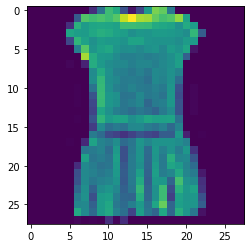

In [17]:
imgIndex = 3 # Numero de indice de la imagen que seleccionamos
img = trainImages[imgIndex]
print("Image Label :",trainLabels[imgIndex]) # Imprimimos la etiqueta de la imagen, la lista está mas abajo
plt.imshow(img) # Mostramos la imagen

In [5]:
print(trainImages.shape)
print(testImages.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
#Create Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
#Compile model
model.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [10]:
#Train model
model.fit(trainImages, trainLabels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 59s 30ms/step - loss: 3.1323 - accuracy: 0.6906
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.7354 - accuracy: 0.7364
Epoch 3/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.6480 - accuracy: 0.7695
Epoch 4/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.5986 - accuracy: 0.7936
Epoch 5/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.5656 - accuracy: 0.8090


In [11]:
#Evaluate model
model.evaluate(testImages, testLabels)

313/313 [==============================] - 29s 92ms/step - loss: 0.6478 - accuracy: 0.7982


[0.6478496193885803, 0.7982000112533569]

In [12]:
# Estas son las predicciones de las 5 imágenes, como se vé es una matriz de 5x9, las filas representan las imágenes
# seleccionadas del índice y las columnas representan el tanto por ciento que existe de probabilidad de que esa
# imagen se corresponda con su etiqueta, vemos como la columna 9 de la fila 1 = 9.9236852e-01 lo que significa que la imagen 0
# del indice tiene un 99,23% de probabilidades de que esa sea su etiqueta, es decir, la 9 = Ankle boot

predictions = model.predict(testImages[0:5])

# Print the predicted labels
print(predictions)

1/1 [==============================] - 0s 146ms/step
[[3.3390076e-20 2.7019782e-21 0.0000000e+00 1.1915131e-14 0.0000000e+00
  6.7581232e-03 1.0478553e-28 8.7343535e-04 5.4882167e-19 9.9236852e-01]
 [1.1721997e-03 5.2376779e-12 9.9541819e-01 9.3938525e-06 1.3303496e-06
  3.2881014e-26 3.3989237e-03 0.0000000e+00 1.3663119e-08 1.3181418e-37]
 [3.9084422e-10 1.0000000e+00 9.2374710e-12 1.0663063e-09 2.3339678e-20
  0.0000000e+00 9.6894579e-14 0.0000000e+00 1.3858202e-11 0.0000000e+00]
 [4.2006247e-09 1.0000000e+00 2.5579917e-11 3.1592695e-08 9.2786173e-19
  0.0000000e+00 4.4761406e-13 0.0000000e+00 2.3469513e-11 0.0000000e+00]
 [1.9396840e-01 3.6669482e-13 3.0231278e-02 2.4565554e-04 2.2266981e-05
  6.4530279e-20 7.7546304e-01 2.7037344e-36 6.9307775e-05 8.6275430e-25]]


In [13]:
#Labels
#0-T-shirt/top
#1-Trouser
#2-Pullover
#3-Dress
#4-Coat
#5-Sandal
#6-Shirt
#7-Sneaker
#8-Bag
#9-Ankle boot

print(np.argmax(predictions, axis=1))
# Print the actual label values
print(testLabels[0:5])

[9 2 1 1 6]
[9 2 1 1 6]


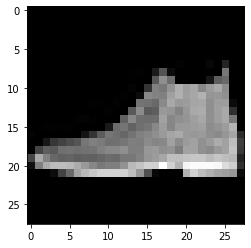

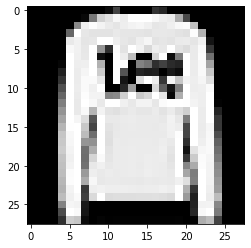

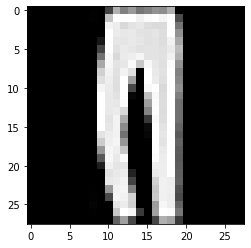

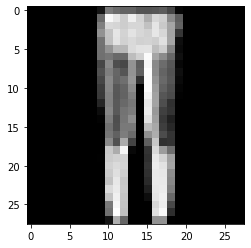

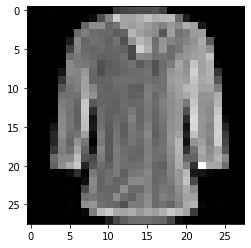

In [14]:
for i in range(0,5):
  plt.imshow(testImages[i], cmap='gray')
  plt.show()